In [1]:
 #===================================================== Import libraries ================================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn 
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# ================================================= Base VGG-16 Network ================================================================================
# ================================================= Flexible Layer ================================================================================

    
class FlexiLayer_base(nn.Module): # class FlexiLayer(nn.Conv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1,
                 padding=0):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        super(FlexiLayer_base, self).__init__()
        
        self.t_1 = nn.Conv2d(self.in_channels, self.out_channels, self.kernel_size, self.stride, self.padding)
        self.t_2 = nn.MaxPool2d(self.kernel_size, self.stride, self.padding) # get max result with the same kernel size
        self.m = nn.Sigmoid()
        
        self.threshold1 = Variable(torch.randn((1, self.out_channels, 30, 30)))
        
        self.thresh_mean = []
        
    def forward(self, t):
        
        #self.threshold1.expand(t.size(0), self.out_channels, 30, 30)
        
        
        #cond = torch.sub(self.t_2(t), self.threshold1.cuda())
        #t_2_2 = self.m(cond*50)*self.t_2(t) # 
        #t_1_1 = self.m(cond*(-50))*self.t_1(t) # 
        #t = torch.add(t_2_2, t_1_1)
        
        return self.t_1(t) #t

    # ================================================= VGG-16 Network ================================================================================
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16,self).__init__()

        self.block1 = nn.Sequential(
                      nn.Conv2d(in_channels = 3,out_channels = 64,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(64),
                      nn.ReLU(),
                      FlexiLayer_base(in_channels = 64,out_channels = 64,kernel_size = 3, padding =0),
                      nn.BatchNorm2d(64),
                      nn.ReLU(),
                      #nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Dropout2d(0.3))

        self.block2 = nn.Sequential(
                      nn.Conv2d(in_channels = 64,out_channels = 128,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(128),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 128,out_channels = 128,kernel_size = 3, padding =1),
                      nn.BatchNorm2d(128),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Dropout2d(0.4))

        self.block3 = nn.Sequential(
                      nn.Conv2d(in_channels = 128,out_channels = 256,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(256),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 256,out_channels = 256,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(256),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 256,out_channels = 256,kernel_size = 3, padding =1),
                      nn.BatchNorm2d(256),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Dropout2d(0.4))

        self.block4 = nn.Sequential(
                      nn.Conv2d(in_channels = 256,out_channels = 512,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3, padding =1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2) ,
                      nn.Dropout2d(0.4))

        self.block5 = nn.Sequential(
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3, padding =1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Dropout2d(0.5) )

        self.fc =     nn.Sequential(
                      nn.Linear(512,100),
                      nn.Dropout(0.5),
                      nn.BatchNorm1d(100),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                      nn.Linear(100,10), )

    def forward(self,x):
        out = self.block1(x)
        out = self.block2(out)
        out = self.block3(out)
        out = self.block4(out)
        out = self.block5(out)
        out = out.view(out.size(0),-1)
        out = self.fc(out)

        return out

In [2]:


# ================================================= Flexible Layer ================================================================================

    
class FlexiLayer(nn.Module): # class FlexiLayer(nn.Conv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1,
                 padding=0):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        super(FlexiLayer, self).__init__()
        
        self.t_1 = nn.Conv2d(self.in_channels, self.out_channels, self.kernel_size, self.stride, self.padding)
        self.t_2 = nn.MaxPool2d(self.kernel_size, self.stride, self.padding) # get max result with the same kernel size
        self.m = nn.Sigmoid()
        
        self.threshold1 = Variable(torch.randn((1, self.out_channels, 30, 30)))
        
        self.thresh_mean = []
        
    def forward(self, t):
        
        self.threshold1.expand(t.size(0), self.out_channels, 30, 30)
        
        
        cond = torch.sub(self.t_2(t), self.threshold1.cuda())
        t_2_2 = self.m(cond*50)*self.t_2(t) # 
        t_1_1 = self.m(cond*(-50))*self.t_1(t) # 
        t = torch.add(t_2_2, t_1_1)
        
        return t

    # ================================================= VGG-16 Network ================================================================================
class flexVGG16(nn.Module):
    def __init__(self):
        super(flexVGG16,self).__init__()

        self.block1 = nn.Sequential(
                      nn.Conv2d(in_channels = 3,out_channels = 64,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(64),
                      nn.ReLU(),
                      FlexiLayer(in_channels = 64,out_channels = 64,kernel_size = 3, padding =0),
                      nn.BatchNorm2d(64),
                      nn.ReLU(),
                      #nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Dropout2d(0.3))

        self.block2 = nn.Sequential(
                      nn.Conv2d(in_channels = 64,out_channels = 128,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(128),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 128,out_channels = 128,kernel_size = 3, padding =1),
                      nn.BatchNorm2d(128),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Dropout2d(0.4))

        self.block3 = nn.Sequential(
                      nn.Conv2d(in_channels = 128,out_channels = 256,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(256),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 256,out_channels = 256,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(256),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 256,out_channels = 256,kernel_size = 3, padding =1),
                      nn.BatchNorm2d(256),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Dropout2d(0.4))

        self.block4 = nn.Sequential(
                      nn.Conv2d(in_channels = 256,out_channels = 512,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3, padding =1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2) ,
                      nn.Dropout2d(0.4))

        self.block5 = nn.Sequential(
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3,padding = 1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = 512,out_channels = 512,kernel_size = 3, padding =1),
                      nn.BatchNorm2d(512),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Dropout2d(0.5) )

        self.fc =     nn.Sequential(
                      nn.Linear(512,100),
                      nn.Dropout(0.5),
                      nn.BatchNorm1d(100),
                      nn.ReLU(),
                      nn.Dropout(0.5),
                      nn.Linear(100,10), )

    def forward(self,x):
        out = self.block1(x)
        out = self.block2(out)
        out = self.block3(out)
        out = self.block4(out)
        out = self.block5(out)
        out = out.view(out.size(0),-1)
        out = self.fc(out)

        return out


In [3]:
'''
Date: 03 Sept 2020

Python version:      3.7
PyTorch version:     1.2.0

@author: Linnea Evanson

DiCarlo Dataset

VGG16 model trained on CIFAR10 dataset with one Flexible Layer in block1

For RDM comparison want to change this to be V4 as the neural data for comparison with rather than IT as it was in the paper 
Maybe do without noise, as will not have the constants from the paper and noise did not seem to make a huge difference 

'''

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import torchvision
import torchvision.transforms as transforms
from itertools import islice, accumulate
import seaborn as sb
import scipy.spatial.distance
import numpy
import pandas as pd
from torchvision import models
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat

#from models.Flexible_Layer import FlexiLayer #load the Flexilayer class (from models.VGG16_with_flex_v5)


# ======================================== Load the Pretrained Model ==========================================================================================
mean_cifar10 = [0.485, 0.456, 0.406]   #this is the same as for imagenet dataset
std_cifar10 = [0.229, 0.224, 0.225]
batch_size = 100


# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
use_cuda=True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Initialize the network
fmodel = flexVGG16()
if torch.cuda.is_available():
    fmodel.cuda()
    print("Using cuda")
        
# # Load the pretrained model
fstate = torch.load('models/cifar10_downsampled/VGG16-flex-v5-block1-nnmodule_50_downsampl_model_150_22.pth') #, map_location=torch.device('cpu')) #added map_location to specify cpu use

fmodel.load_state_dict(fstate['model'])

fmodel.to(device)
print('Flex layer state loaded')



CUDA Available:  True
Using cuda
Flex layer state loaded


In [4]:
# Use the model object to select the desired layer
flayer = fmodel._modules.get('block1') #choose the second last layer (with features, before the fc layer)
fmodel.eval()

flexVGG16(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): FlexiLayer(
      (t_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (t_2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
      (m): Sigmoid()
    )
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Dropout2d(p=0.3, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padd

In [5]:
#Load the normal VGG16 model:
model = VGG16()
if torch.cuda.is_available():
    model.cuda()
    print("Using cuda")

state = torch.load('models/cifar10_downsampled/VGG16-flex-v5-block1-nnmodule_50_downsampl_BASE_model_150_16.pth') #map_location=torch.device('cpu')) #added map_location to specify cpu use

model.load_state_dict(state['model'])
model.to(device)

print('VGG16 state loaded')

layer = model._modules.get('block1') #choose the second last layer (with features, before the fc layer)

model.eval()


Using cuda
VGG16 state loaded


VGG16(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): FlexiLayer_base(
      (t_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (t_2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
      (m): Sigmoid()
    )
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Dropout2d(p=0.3, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, pad

In [6]:
#----------------------------------------Functions to scale and transform the images---------------------
scaler = transforms.Scale((32, 32))  #scale to cifar10 size
normalize = transforms.Normalize(mean=mean_cifar10,   #should this be cifar10 or Dicarlo mean & std?
                                 std=std_cifar10)
to_tensor = transforms.ToTensor()

/home/levanson/anaconda3/envs/venv_clone/lib/python3.8/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [7]:
#-----------------------------Function to get the feature vector-----------------------------------

def get_vector(image_name, model, layer,dim ):
    
    img = Image.open(image_name) #Load the image with Pillow library
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0)) 
    my_embedding = torch.zeros(64*dim*dim) # Create a vector of zeros that will hold our feature vector
    
    def copy_data(m, i, o): #m =self, i = input, o = output # Define a function that will copy the output of a layer
        print(o.data.shape)
        my_embedding.copy_(o.data.squeeze().reshape(-1))

    h = layer.register_forward_hook(copy_data) # Attach that function to our selected layer
    model(t_img.to(device))    # Run the model on our transformed image
    h.remove()     # Detach our copy function from the layer

    return my_embedding     #Return the feature vector

In [8]:
def get_array(file):
    annots = loadmat(file)
    print("Meta:     ",type(annots['meta']),annots['meta'].shape)
    print("Features: ",type(annots['features']),annots['features'].shape)

    print("                       Image                               Classification       Train (1)/Test(0)")
    [print("Line 1 of Meta: ",annots['meta'][1])]
    
    feature_length = len(annots['features'][1])
    #Order by category
    count = 0
    animal_features, car_features, chair_features, face_features, fruit_features, plane_features, table_features = [],[],[],[],[],[],[]
    animal_features2, car_features2, chair_features2, face_features2, fruit_features2, plane_features2, table_features2 = [],[],[],[],[],[],[]
    for i in np.nditer(annots['meta']):
        if "Animals" in str(i):
            animal_features.append(annots['features'][count])
            animal_features2.append(annots['meta'][count])
        if 'Cars' in str(i):
            car_features.append(annots['features'][count])
            car_features2.append(annots['meta'][count])
        if 'Chairs' in str(i):
            chair_features.append(annots['features'][count])
            chair_features2.append(annots['meta'][count])
        if 'Faces' in str(i):
            face_features.append(annots['features'][count])
            face_features2.append(annots['meta'][count])
        if 'Fruits' in str(i):
            fruit_features.append(annots['features'][count])
            fruit_features2.append(annots['meta'][count])
        if 'Planes' in str(i):
            plane_features.append(annots['features'][count])
            plane_features2.append(annots['meta'][count])
        if 'Tables' in str(i):
            table_features.append(annots['features'][count])
            table_features2.append(annots['meta'][count])
        count += 1
    ordered_array = np.concatenate((animal_features,car_features,chair_features,face_features,fruit_features,plane_features,table_features), axis = 0) #makes each object a row
    ordered_meta = np.concatenate((animal_features2,car_features2,chair_features2,face_features2,fruit_features2,plane_features2,table_features2), axis = 0) #makes each object a row

    print("done searching file")
    return ordered_array, ordered_meta, feature_length


In [9]:
def get_splits(ordered_meta, ordered_array, feature_length):

    #Get splits    
    rounds = np.zeros((1960,10),dtype=int)
    count = 0
    for line in ordered_meta:
        line_split = []
        for word in line.split():
            line_split.append(word)
        for i in range(10):
            rounds[count][i] = line_split[i+2] #the first two are
        count += 1
    
    #get features for each of the vectors with a 1, put in large array
    features = []
    for i in range(10):
        perc = 0 #track if 20% is being added to each of the 10 iterations
        temp = []
        for j in range(1960):
            if rounds.T[i][j] == 0: #get only the 20% of test data
                temp.append(ordered_array[j])
                perc += 1
        features.append(temp)
        print("Number of 0 (should be 392)",perc)
    print("We want an array of 10 x 392 x feature_length:")
    print(len(features),len(features[0]),len(features[0][0]))
    
    return features #the array of arrays with the train and test splits for the 10 rounds of 20%

In [10]:
def get_mean_array(ordered_array,feature_length,split_marker):  #split_marker is whether it is the whole dataset or 20% splits
    #split_marker = 40 for whole dataset
    #split_marker = 8 for 20% dataset
    objects = [split_marker for i in range(49)] #create 49 groups, of 40 images each (the 49 objects)
    features_split = [ordered_array[x - y: x] for x, y in zip(accumulate(objects), objects)] 
    
    object_means = np.zeros((49,feature_length))

    for i in range(49): #go through all 7 objects
        object_means[i] = np.mean(features_split[i], axis=0)
    print("found mean array")
    return object_means

In [11]:
def calc_rdm(mean_array):
    #Create the RDM matrix
    df = pd.DataFrame(mean_array.T)
    
    #Use pandas dataframe
    rdm = 1 - df.corr()
    print("RDM shape: ",rdm.shape)
    
    return rdm

In [12]:
#Extract meta data so we know classification of each image AND can compare to neural data:
#-------------------------------------------------------------------------


#Just switched order of filenames so V4 is first, so it will be the comparison rather than IT.
filenames = ['DiCarlo_Lab_Data/NeuralData_V4_multiunits.mat','DiCarlo_Lab_Data/NeuralData_IT_multiunits.mat','DiCarlo_Models/Models_HMAX.mat','DiCarlo_Models/Models_HMO.mat','DiCarlo_Models/Models_Krizhevsky2012.mat','DiCarlo_Models/Models_V1like.mat','DiCarlo_Models/Models_V2like.mat','DiCarlo_Models/Models_ZeilerFergus2013.mat']

rdm = np.zeros((len(filenames),49,49))
rdm_splits = []
#Sizes of each matrix will be different depending on feature length of that file, so use lists.
ordered_array = []
mean_array = []
splits = []
mean_splits = []

count = 0
for file in filenames:
    temp, ordered_meta, feature_length = get_array(file)
    ordered_array.append(temp)
    mean_array.append(get_mean_array(ordered_array[count], feature_length,40))
    
    rdm[count] = calc_rdm(mean_array[count])

    #The 20% splits, 10 times, for the spearman calcs only
    splits.append(get_splits(ordered_meta, ordered_array[count], feature_length)) #feature vectors of 20% of the images -doesn't matter the order as we are not going to display the rdm
    mean_splits.append([get_mean_array(i, feature_length,8) for i in splits[count]])

    rdm_splits.append([calc_rdm(i) for i in mean_splits[count]]) #we can use this array to calculate the spearman of each round

    count += 1
#-------------------------------------------------------------


Meta:      <class 'numpy.ndarray'> (1960,)
Features:  <class 'numpy.ndarray'> (1960, 128)
                       Image                               Classification       Train (1)/Test(0)
Line 1 of Meta:  images/f6ad757411d3002ef3b6a32f2b366b5a40cb2053.png Fruits 1 1 1 1 1 1 1 1 0 1 
done searching file
found mean array
RDM shape:  (49, 49)
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
We want an array of 10 x 392 x feature_length:
10 392 128
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM 

RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)


In [13]:
#Save these rdm calculations as we don't need to run them every time:
#These are the rdm we will actually want to display
import pickle

with open('rdm_V4.pkl', 'wb') as f:
    pickle.dump(rdm, f)

#The splits RDM we will use for the Spearman calculations but not display do they don't need to be reloaded or saved 

#Load them back again
#with open('rdm.pkl', 'rb') as f:
#    rdm = pickle.load(f)


In [14]:
#Need to check this for other files -----------------------
annots_flex = loadmat(filenames[0]) #load one of the files to have the category tags of images
image = []
for line in annots_flex['meta']:
    for word in line.split():
        if word.endswith('.png'):
            image.append(word)   


In [15]:
# # Load the images iteratively and run them through the network to find their weights #assuming model.eval is sufficient to prevent saving weights although torch.no_grad could be used as well
# # Can use the indices for the images already found.


# #Find indices of each category (same for flex and normal VGG16)
fruit_indexs_flex = [i for i, value in enumerate(annots_flex['meta']) if ('Fruits' in annots_flex['meta'][i])]
car_indexs_flex = [i for i, value in enumerate(annots_flex['meta']) if ('Cars' in annots_flex['meta'][i])]
animal_indexs_flex = [i for i, value in enumerate(annots_flex['meta']) if ('Animals' in annots_flex['meta'][i])]
plane_indexs_flex = [i for i, value in enumerate(annots_flex['meta']) if ('Planes' in annots_flex['meta'][i])]
chair_indexs_flex = [i for i, value in enumerate(annots_flex['meta']) if ('Chairs' in annots_flex['meta'][i])]
table_indexs_flex = [i for i, value in enumerate(annots_flex['meta']) if ('Tables' in annots_flex['meta'][i])]
face_indexs_flex = [i for i, value in enumerate(annots_flex['meta']) if ('Faces' in annots_flex['meta'][i])]

# #Get flex outputs
ordered_indexs_flex = np.concatenate((animal_indexs_flex,car_indexs_flex,chair_indexs_flex,face_indexs_flex,fruit_indexs_flex,plane_indexs_flex,table_indexs_flex), axis=0) 
#Get outputs from the two models
count = 0
ordered_flex = np.zeros((1960,64*30*30))
ordered_vgg = np.zeros((1960,64*30*30))
for i in ordered_indexs_flex:
    ordered_flex[count] = get_vector("DiCarlo_Lab_Data/%s"% (image[i]),fmodel,flayer,30)
    ordered_vgg[count] = get_vector("DiCarlo_Lab_Data/%s"% (image[i]),model,layer,30)
    print(count*100/1960,"% features extracted")
    count += 1


# #Save the neural data, after running through the network:
with open('ordered_flex256_downsampled.pkl', 'wb') as f:
    pickle.dump(ordered_flex, f)

with open('ordered_vgg256_downsampled.pkl', 'wb') as f:
    pickle.dump(ordered_vgg, f)


torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.0 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.05102040816326531 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.10204081632653061 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.15306122448979592 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.20408163265306123 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.25510204081632654 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.30612244897959184 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.35714285714285715 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.40816326530612246 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
0.45918367346938777 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64,

torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
4.6938775510204085 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
4.744897959183674 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
4.795918367346939 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
4.846938775510204 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
4.8979591836734695 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
4.948979591836735 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
5.0 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
5.051020408163265 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
5.1020408163265305 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
5.153061224489796 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
5.204

9.387755102040817 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.438775510204081 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.489795918367347 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.540816326530612 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.591836734693878 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.642857142857142 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.693877551020408 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.744897959183673 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.795918367346939 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.846938775510203 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
9.89795918367347 % features extracted
torch.Size([

torch.Size([1, 64, 30, 30])
13.877551020408163 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
13.928571428571429 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
13.979591836734693 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
14.03061224489796 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
14.081632653061224 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
14.13265306122449 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
14.183673469387756 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
14.23469387755102 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
14.285714285714286 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
14.33673469387755 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
14.3877551020408

torch.Size([1, 64, 30, 30])
18.316326530612244 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.367346938775512 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.418367346938776 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.46938775510204 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.520408163265305 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.571428571428573 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.622448979591837 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.6734693877551 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.724489795918366 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.775510204081634 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
18.826530612244

torch.Size([1, 64, 30, 30])
22.70408163265306 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
22.755102040816325 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
22.806122448979593 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
22.857142857142858 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
22.908163265306122 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
22.959183673469386 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
23.010204081632654 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
23.06122448979592 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
23.112244897959183 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
23.163265306122447 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
23.21428571428

torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.142857142857142 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.193877551020407 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.244897959183675 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.29591836734694 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.346938775510203 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.397959183673468 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.448979591836736 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.5 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.551020408163264 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
27.602040816326532 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])

31.785714285714285 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
31.836734693877553 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
31.887755102040817 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
31.93877551020408 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
31.989795918367346 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
32.04081632653061 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
32.09183673469388 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
32.142857142857146 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
32.19387755102041 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
32.244897959183675 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
32.295918367346935 % features extracted
torc

torch.Size([1, 64, 30, 30])
36.53061224489796 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
36.58163265306123 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
36.63265306122449 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
36.683673469387756 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
36.734693877551024 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
36.785714285714285 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
36.83673469387755 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
36.88775510204081 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
36.93877551020408 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
36.98979591836735 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
37.04081632653061 %

torch.Size([1, 64, 30, 30])
41.224489795918366 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.275510204081634 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.326530612244895 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.37755102040816 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.42857142857143 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.47959183673469 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.53061224489796 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.58163265306123 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.63265306122449 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.683673469387756 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
41.734693877551024

45.91836734693877 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
45.96938775510204 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
46.02040816326531 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
46.07142857142857 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
46.12244897959184 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
46.173469387755105 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
46.224489795918366 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
46.275510204081634 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
46.326530612244895 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
46.37755102040816 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
46.42857142857143 % features extracted
torch.S

torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
50.61224489795919 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
50.66326530612245 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
50.714285714285715 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
50.765306122448976 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
50.816326530612244 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
50.86734693877551 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
50.91836734693877 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
50.96938775510204 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
51.02040816326531 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
51.07142857142857 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 

55.255102040816325 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.30612244897959 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.357142857142854 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.40816326530612 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.45918367346939 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.51020408163265 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.56122448979592 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.61224489795919 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.66326530612245 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.714285714285715 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
55.765306122448976 % features extracted
torch.S

torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
59.69387755102041 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
59.744897959183675 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
59.795918367346935 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
59.8469387755102 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
59.89795918367347 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
59.94897959183673 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
60.0 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
60.05102040816327 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
60.10204081632653 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
60.1530612244898 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
60.2040

torch.Size([1, 64, 30, 30])
64.18367346938776 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.23469387755102 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.28571428571429 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.33673469387755 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.38775510204081 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.43877551020408 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.48979591836735 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.54081632653062 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.59183673469387 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.64285714285714 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
64.6938775510204 % fea

torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
68.62244897959184 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
68.6734693877551 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
68.72448979591837 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
68.77551020408163 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
68.8265306122449 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
68.87755102040816 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
68.92857142857143 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
68.9795918367347 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
69.03061224489795 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
69.08163265306122 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30

torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.41836734693878 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.46938775510205 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.5204081632653 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.57142857142857 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.62244897959184 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.6734693877551 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.72448979591837 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.77551020408163 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.8265306122449 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
73.87755102040816 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30

torch.Size([1, 64, 30, 30])
77.90816326530613 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
77.95918367346938 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
78.01020408163265 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
78.06122448979592 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
78.11224489795919 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
78.16326530612245 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
78.21428571428571 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
78.26530612244898 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
78.31632653061224 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
78.36734693877551 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
78.41836734693878 % fe

82.34693877551021 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.39795918367346 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.44897959183673 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.5 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.55102040816327 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.60204081632654 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.65306122448979 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.70408163265306 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.75510204081633 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.8061224489796 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
82.85714285714286 % features extracted
torch.Size([1, 64, 30, 30

torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.04081632653062 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.09183673469387 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.14285714285714 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.1938775510204 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.24489795918367 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.29591836734694 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.34693877551021 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.39795918367346 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.44897959183673 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.5 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
87.55102

torch.Size([1, 64, 30, 30])
91.73469387755102 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
91.78571428571429 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
91.83673469387755 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
91.88775510204081 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
91.93877551020408 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
91.98979591836735 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
92.04081632653062 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
92.09183673469387 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
92.14285714285714 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
92.1938775510204 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
92.24489795918367 % fea

torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.4795918367347 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.53061224489795 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.58163265306122 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.63265306122449 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.68367346938776 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.73469387755102 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.78571428571429 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.83673469387755 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.88775510204081 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 30])
96.93877551020408 % features extracted
torch.Size([1, 64, 30, 30])
torch.Size([1, 64, 30, 

In [16]:
# def get_ordered_meta(annots):

#     #Order by category
#     count = 0
#     animal_features2, car_features2, chair_features2, face_features2, fruit_features2, plane_features2, table_features2 = [],[],[],[],[],[],[]
#     for i in np.nditer(annots['meta']):
#         if "Animals" in str(i):
#             animal_features2.append(annots['meta'][count])
#         if 'Cars' in str(i):
#             car_features2.append(annots['meta'][count])
#         if 'Chairs' in str(i):
#             chair_features2.append(annots['meta'][count])
#         if 'Faces' in str(i):
#             face_features2.append(annots['meta'][count])
#         if 'Fruits' in str(i):
#             fruit_features2.append(annots['meta'][count])
#         if 'Planes' in str(i):
#             plane_features2.append(annots['meta'][count])
#         if 'Tables' in str(i):
#             table_features2.append(annots['meta'][count])
#         count += 1
#     ordered_meta = np.concatenate((animal_features2,car_features2,chair_features2,face_features2,fruit_features2,plane_features2,table_features2), axis = 0) #makes each object a row
#     return ordered_meta

In [17]:
# #Get ordered meta:
# ordered_meta = get_ordered_meta(annots_flex)

# #Save ordered meta:
# numpy.savetxt("ordered_meta.csv", ordered_meta, delimiter=",",fmt='%s')

In [18]:
#Load model outputs

#with open('ordered_flex256_downsampled.pkl', 'rb') as f:
#    ordered_flex = pickle.load(f)
#print("loaded ordered flex")

#with open('ordered_vgg256_downsampled.pkl', 'rb') as f:
#    ordered_vgg = pickle.load(f)
#print("loaded ordered vgg")

ordered_meta = np.loadtxt("Final-Images_RDM/ordered_meta.csv", delimiter = ',', dtype = 'str')
print("loaded ordered meta")

loaded ordered meta


In [19]:
def get_model_results(ordered_array, ordered_meta, feature_length):
    splits = get_splits(ordered_meta, ordered_array, feature_length) #feature vectors of 20% of the images -doesn't matter the order as we are not going to display the rdm
    mean_splits = [get_mean_array(i, feature_length,8) for i in splits]
    
    rdm_splits = [calc_rdm(i) for i in mean_splits] #we can use this array to calculate the spearman of each round
    return rdm_splits 

In [20]:
#Get the 20% 10 time splits for the model outputs(use the same splits defined in the paper)
vgg_feature_length = 64*30*30
flex_feature_length = 64*30*30
vgg_rdm_splits = get_model_results(ordered_vgg,ordered_meta, vgg_feature_length)
flex_rdm_splits = get_model_results(ordered_flex, ordered_meta, flex_feature_length)


Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
We want an array of 10 x 392 x feature_length:
10 392 57600
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
found mean array
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
RDM shape:  (49, 49)
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (should be 392) 392
Number of 0 (sho

In [21]:
print(ordered_flex.shape)
print(ordered_vgg.shape)

(1960, 57600)
(1960, 57600)


In [22]:
#Process the VGG16 and Flex outputs:
#feature_length = 512 #for block 5 of VGG16 and Flex networks

mean_flex = get_mean_array(ordered_flex, flex_feature_length,40)
mean_vgg = get_mean_array(ordered_vgg, vgg_feature_length,40)


found mean array
found mean array


In [23]:
def get_top_half(rdm):
    rdm_top = []
    for i in range(49): #create upper tringle 
        for j in range(49):
            if i < j:
                rdm_top.append(rdm[i][j])
    return rdm_top

In [24]:
#Create the 49x49 RDM

df_flex = pd.DataFrame(mean_flex.T)
df_vgg = pd.DataFrame(mean_vgg.T)

#Use pandas dataframe
rdm_flex = 1 - df_flex.corr()  #e-08

rdm_vgg = 1 - df_vgg.corr()  #e-07

print(rdm[0])

[[0.         0.99400993 0.6534988  ... 1.12107811 0.62865923 0.64100595]
 [0.99400993 0.         0.85656519 ... 0.91766758 1.39097461 1.45254543]
 [0.6534988  0.85656519 0.         ... 1.33133455 0.6580695  0.75234177]
 ...
 [1.12107811 0.91766758 1.33133455 ... 0.         0.99741127 1.00967276]
 [0.62865923 1.39097461 0.6580695  ... 0.99741127 0.         0.25323959]
 [0.64100595 1.45254543 0.75234177 ... 1.00967276 0.25323959 0.        ]]


(0.0, 49.0, 49.0, 0.0)

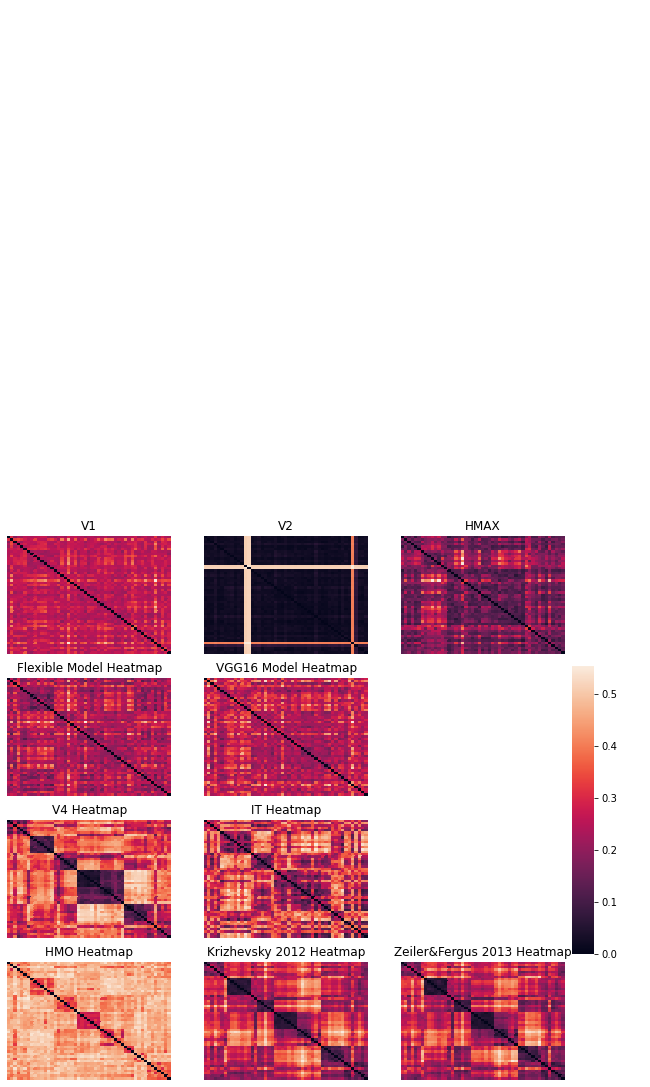

In [25]:
#Plot the RDMs as a Heatmaps
from mpl_toolkits.axes_grid1 import AxesGrid

fig, ((ax11,ax22,ax33),(ax, ax2, a),(ax3,ax4, b),(ax5,ax6,ax7)) = plt.subplots(4, 3, figsize=(10, 10))

cbar_ax = fig.add_axes([.91,.3,.03,.4])

#Let's show V1 and V2 as the spearman values are similar to Flex and VGG16
#order of the rdm matrices: ['Flex','VGG16','V4','HMAX','HMO','Kriv','V1','V2','ZF']


heatmap_V1 = sb.heatmap(rdm[5],ax=ax11,cbar=True,cbar_ax = cbar_ax)
ax11.set_title("V1")
ax11.axis('off')
heatmap_V2 = sb.heatmap(rdm[6],ax=ax22,cbar=True,cbar_ax = cbar_ax)
ax22.set_title("V2")
ax22.axis('off')
heatmap_HMAX = sb.heatmap(rdm[2],ax=ax33,cbar=True,cbar_ax = cbar_ax)
ax33.set_title("HMAX")
ax33.axis('off')

a.axis('off')
b.axis('off')

ax2.axis('off')
heatmap_flex = sb.heatmap(rdm_flex,ax=ax,cbar=True,cbar_ax = cbar_ax)
ax.set_title("Flexible Model Heatmap")
ax.axis('off')
heatmap_vgg = sb.heatmap(rdm_vgg,ax=ax2,cbar=True,cbar_ax=cbar_ax)
ax2.set_title("VGG16 Model Heatmap")
ax2.axis('off')
heatmap_V4 = sb.heatmap(rdm[1],ax=ax3,cbar=True,cbar_ax = cbar_ax)
ax3.set_title("V4 Heatmap")
ax3.axis('off')
heatmap_IT = sb.heatmap(rdm[0],ax=ax4,cbar=True,cbar_ax = cbar_ax)
ax4.set_title("IT Heatmap")
ax4.axis('off')
#HMAX is rdm[2] (not shown in DiCarlo paper)
heatmap_HMO = sb.heatmap(rdm[3],ax=ax5,cbar=True,cbar_ax = cbar_ax)
ax5.set_title("HMO Heatmap")
ax5.axis('off')
heatmap_Krizhevsky = sb.heatmap(rdm[4],ax=ax6,cbar=True,cbar_ax = cbar_ax)
ax6.set_title("Krizhevsky 2012 Heatmap")
ax6.axis('off')
heatmap_ZF = sb.heatmap(rdm[7],ax=ax7,cbar=True,cbar_ax = cbar_ax)
ax7.set_title("Zeiler&Fergus 2013 Heatmap")
ax7.axis('off')


Flex SpearmanrResult(correlation=0.353483074605138, pvalue=6.156124992445852e-36)
VGG SpearmanrResult(correlation=0.35900091897421665, pvalue=4.312687792103009e-37)
SpearmanrResult(correlation=0.4056431436075216, pvalue=8.422419117217345e-48)
SpearmanrResult(correlation=0.39159359573472, pvalue=2.1662109287952969e-44)
SpearmanrResult(correlation=0.4355059393919718, pvalue=1.2955112759049048e-55)
SpearmanrResult(correlation=0.2640377830844552, pvalue=3.2952934341701076e-20)
SpearmanrResult(correlation=0.25652916239798035, pvalue=3.9720547899495947e-19)
SpearmanrResult(correlation=0.18617629622032655, pvalue=1.2424020326478248e-10)
SpearmanrResult(correlation=0.3060351999220845, pvalue=6.431812544012871e-27)


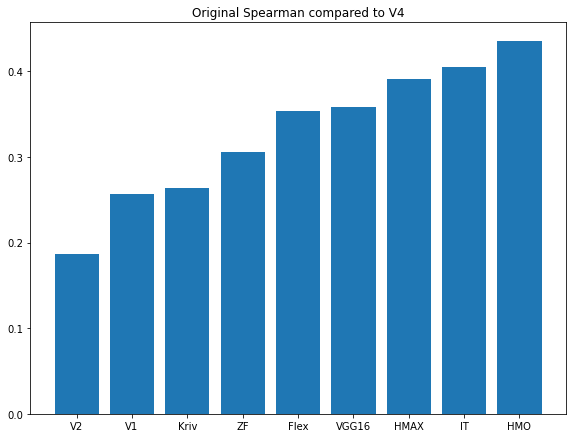

In [30]:
#Compute Spearman correlation between dissimilarity matrices (visualise as bar graph):
#"Between the upper triangular, non-diagonal elements of the two RDMs"
#Compare to rdm[1], which is the IT RDM matrix.
#p-value close to 0 means the correlation is very unlikely to be due to chance

spearman = []
#filenames = ['DiCarlo_Lab_Data/NeuralData_V4_multiunits.mat','DiCarlo_Lab_Data/NeuralData_IT_multiunits.mat','DiCarlo_Models/Models_HMAX.mat','DiCarlo_Models/Models_HMO.mat','DiCarlo_Models/Models_Krizhevsky2012.mat','DiCarlo_Models/Models_V1like.mat','DiCarlo_Models/Models_V2like.mat','DiCarlo_Models/Models_ZeilerFergus2013.mat']
# ['Flex','VGG16','V4',HMAX','HMO','Kriv','V1','V2','ZF']

#Keep only upper triangle
rdm_IT_original = get_top_half(rdm[0])   #this is now V4 but we haven't renamed the variable
rdm_flex_top = get_top_half(rdm_flex)
rdm_vgg_top = get_top_half(rdm_vgg)

spr = scipy.stats.spearmanr(rdm_flex_top,rdm_IT_original)
spearman.append(spr[0]) #Flex layer
print("Flex",spr)
spr_vgg = scipy.stats.spearmanr(rdm_vgg_top,rdm_IT_original)
spearman.append(spr_vgg[0]) #Flex layer
print("VGG",spr_vgg)
            
for k in range(8):
    if k != 0:
        rdm_temp = get_top_half(rdm[k])
        spr = scipy.stats.spearmanr(rdm_temp,rdm_IT_original)
        print(spr)
        spearman.append(spr[0])
#Create boxplot:

plt.figure(figsize = [1.5*6.4, 1.5*4.8])
tick_labels = ['Flex','VGG16','IT','HMAX','HMO','Kriv','V1','V2','ZF']
frame = pd.DataFrame(list(zip(spearman, tick_labels)), columns = ['median_spear','tick_labels'])
frame = frame.sort_values(by = 'median_spear')

plt.bar([1,2,3,4,5,6,7,8,9],frame['median_spear'], capsize = 5, label='Spearman Correlations',tick_label = frame['tick_labels'])
plt.title("Original Spearman compared to V4")
plt.show()
#Make same order as the paper


In [31]:
#Load the IT split half consistency, from the "IT Flatten" file:
IT_spearman = np.loadtxt("Final-Images_RDM/IT_spearman.csv", delimiter = ",")


8
10
49


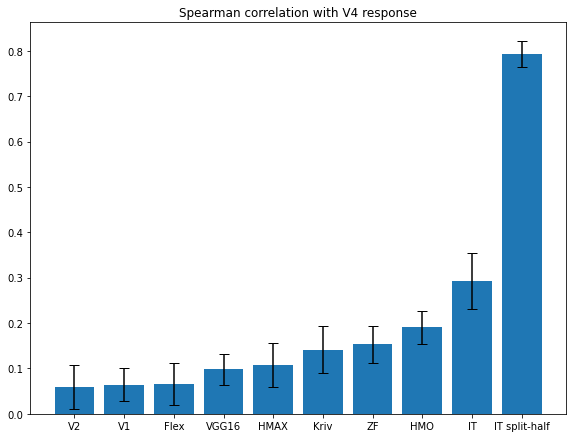

In [32]:
#Let's examine all the RDM's that have been produced for each dataset.
print(len(rdm_splits)) #8 files
print(len(rdm_splits[0]))  #10 splits each 
print(len(rdm_splits[0][0])) #rdm of 49x49 

median_spear = []
mean_spear = []
std_error = []

#For the flex and vgg network:
spearman_flex = []
spearman_vgg = []
for i in range(10): #All 10 iterations of the 20%
    rdm_flex_top = get_top_half(flex_rdm_splits[i])
    rdm_vgg_top = get_top_half(vgg_rdm_splits[i])
    rdm_it = get_top_half(rdm_splits[0][i])

    spr_flex = scipy.stats.spearmanr(rdm_flex_top,rdm_it)
    spearman_flex.append(spr_flex[0]) #Flex layer
    spr_vgg = scipy.stats.spearmanr(rdm_vgg_top,rdm_it)
    spearman_vgg.append(spr_vgg[0]) #Flex layer
#Flex
median_spear.append(np.median(spearman_flex))
mean_spear.append(np.mean(spearman_flex))
std_error.append(np.std(spearman_flex))
#VGG
median_spear.append(np.median(spearman_vgg))
mean_spear.append(np.mean(spearman_vgg))
std_error.append(np.std(spearman_vgg))

#For only the 8 files
#filenames = ['DiCarlo_Lab_Data/NeuralData_V4_multiunits.mat','DiCarlo_Lab_Data/NeuralData_IT_multiunits.mat','DiCarlo_Models/Models_HMAX.mat','DiCarlo_Models/Models_HMO.mat','DiCarlo_Models/Models_Krizhevsky2012.mat','DiCarlo_Models/Models_V1like.mat','DiCarlo_Models/Models_V2like.mat','DiCarlo_Models/Models_ZeilerFergus2013.mat']
for k in range(8):
    spearman = [] #Temp to hold all spearman calcs
    if k != 0:
        for i in range(10): #All 10 iterations of the 20%
            rdm_temp = get_top_half(rdm_splits[k][i])
            rdm_it = get_top_half(rdm_splits[0][i])
            spr = scipy.stats.spearmanr(rdm_temp,rdm_it) #compare with the IT rdm
            spearman.append(spr[0])
        median_spear.append(np.median(spearman))
        mean_spear.append(np.mean(spearman))
        std_error.append(np.std(spearman)) #says in the paper that error bars indicate standard deviation over the 10 splits
        #this is /2 as matplot lib draws that amount on either side

        
 #For the IT split half consistency      ##=====================================but now we are comparing to V4 should we use V4?
median_spear.append(np.median(IT_spearman))
std_error.append(np.std(IT_spearman))
        
#Create boxplot:
plt.figure(figsize = [1.5*6.4, 1.5*4.8])
tick_labels = ['Flex','VGG16','IT','HMAX','HMO','Kriv','V1','V2','ZF','IT split-half']
frame = pd.DataFrame(list(zip(median_spear, tick_labels)), columns = ['median_spear','tick_labels'])
frame = frame.sort_values(by = 'median_spear')

#Ordered
plt.bar([1,2,3,4,5,6,7,8,9,10],frame['median_spear'],yerr = std_error, capsize = 5, label='Spearman Correlations',tick_label = frame['tick_labels'])
plt.title("Spearman correlation with V4 response")
plt.show()